In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.model_selection import GridSearchCV
import multiprocessing 

In [13]:
data = pd.read_excel('Data/Dry_Bean_Dataset.xlsx')

In [15]:
data[:5]

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [18]:
columns = ['영역(A)', '둘레(P)', '장축길이(L)', '단축길이(l)', '종횡비(K)', '편심(Ec)', '볼록 영역(C)', '등가 지름(Ed)', '범위(ex)', '고형도(S)', '진원도(R)', '조밀도(CO)', '형상 계수 1(SF1)', '형상 계수 2(SF2)', '형상 계수 3(SF3)', '형상 계수 4(SF4)]', '구분']

In [20]:
data.columns = columns

In [22]:
data[:3]

영역(A)    둘레(P)     장축길이(L)     단축길이(l)    종횡비(K)    편심(Ec)  볼록 영역(C)  \
0  28395  610.291  208.178117  173.888747  1.197191  0.549812     28715   
1  28734  638.018  200.524796  182.734419  1.097356  0.411785     29172   
2  29380  624.110  212.826130  175.931143  1.209713  0.562727     29690   

    등가 지름(Ed)    범위(ex)    고형도(S)    진원도(R)   조밀도(CO)  형상 계수 1(SF1)  \
0  190.141097  0.763923  0.988856  0.958027  0.913358      0.007332   
1  191.272750  0.783968  0.984986  0.887034  0.953861      0.006979   
2  193.410904  0.778113  0.989559  0.947849  0.908774      0.007244   

   형상 계수 2(SF2)  형상 계수 3(SF3)  형상 계수 4(SF4)]     구분  
0      0.003147      0.834222       0.998724  SEKER  
1      0.003564      0.909851       0.998430  SEKER  
2      0.003048      0.825871       0.999066  SEKER

In [24]:
data.shape

(13611, 17)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   영역(A)          13611 non-null  int64  
 1   둘레(P)          13611 non-null  float64
 2   장축길이(L)        13611 non-null  float64
 3   단축길이(l)        13611 non-null  float64
 4   종횡비(K)         13611 non-null  float64
 5   편심(Ec)         13611 non-null  float64
 6   볼록 영역(C)       13611 non-null  int64  
 7   등가 지름(Ed)      13611 non-null  float64
 8   범위(ex)         13611 non-null  float64
 9   고형도(S)         13611 non-null  float64
 10  진원도(R)         13611 non-null  float64
 11  조밀도(CO)        13611 non-null  float64
 12  형상 계수 1(SF1)   13611 non-null  float64
 13  형상 계수 2(SF2)   13611 non-null  float64
 14  형상 계수 3(SF3)   13611 non-null  float64
 15  형상 계수 4(SF4)]  13611 non-null  float64
 16  구분             13611 non-null  object 
dtypes: float64(14), int64(2), object(1)
memory usage: 

In [127]:
data_df = pd.DataFrame(data, columns=data.columns)
species = pd.Series(data["구분"], dtype = 'category')
data_df['구분'] = species

In [128]:
data_df.describe()

영역(A)         둘레(P)       장축길이(L)       단축길이(l)        종횡비(K)  \
count   13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean    53048.284549    855.283459    320.141867    202.270714      1.583242   
std     29324.095717    214.289696     85.694186     44.970091      0.246678   
min     20420.000000    524.736000    183.601165    122.512653      1.024868   
25%     36328.000000    703.523500    253.303633    175.848170      1.432307   
50%     44652.000000    794.941000    296.883367    192.431733      1.551124   
75%     61332.000000    977.213000    376.495012    217.031741      1.707109   
max    254616.000000   1985.370000    738.860153    460.198497      2.430306   

             편심(Ec)       볼록 영역(C)     등가 지름(Ed)        범위(ex)        고형도(S)  \
count  13611.000000   13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.750895   53768.200206    253.064220      0.749733      0.987143   
std        0.092002   29774.915817     59.177120      0.049086      0.004660   
min        0.218951   20684.000000    161.243764      0.555315      0.919246   
25%        0.715928   36714.500000    215.068003      0.718634      0.985670   
50%        0.764441   45178.000000    238.438026      0.759859      0.988283   
75%        0.810466   62294.000000    279.446467      0.786851      0.990013   
max        0.911423  263261.000000    569.374358      0.866195      0.994677   

             진원도(R)       조밀도(CO)  형상 계수 1(SF1)  형상 계수 2(SF2)  형상 계수 3(SF3)  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.873282      0.799864      0.006564      0.001716      0.643590   
std        0.059520      0.061713      0.001128      0.000596      0.098996   
min        0.489618      0.640577      0.002778      0.000564      0.410339   
25%        0.832096      0.762469      0.005900      0.001154      0.581359   
50%        0.883157      0.801277      0.006645      0.001694      0.642044   
75%        0.916869      0.834270      0.007271      0.002170      0.696006   
max        0.990685      0.987303      0.010451      0.003665      0.974767   

       형상 계수 4(SF4)]  
count   13611.000000  
mean        0.995063  
std         0.004366  
min         0.947687  
25%         0.993703  
50%         0.996386  
75%         0.997883  
max         0.999733

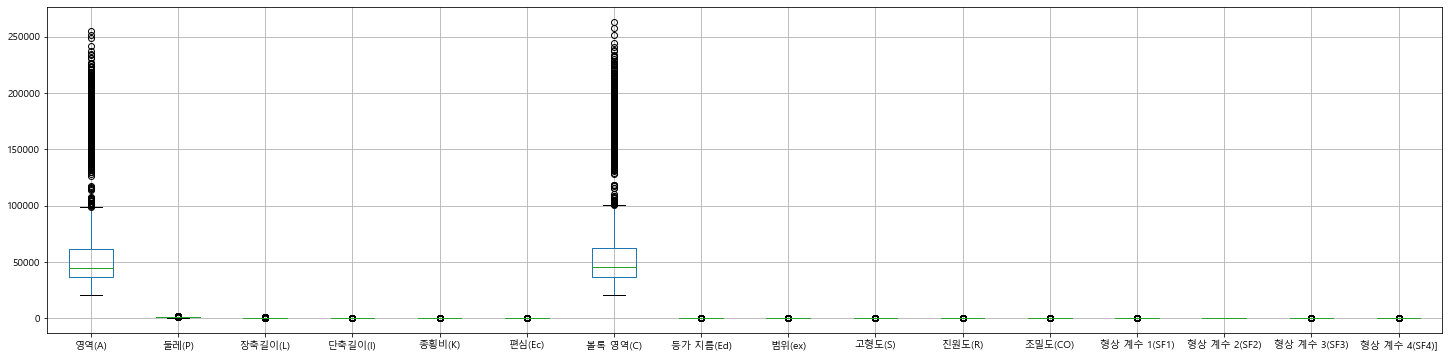

In [137]:
plt.figure(1, figsize=(25,6))
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
data_df.boxplot();

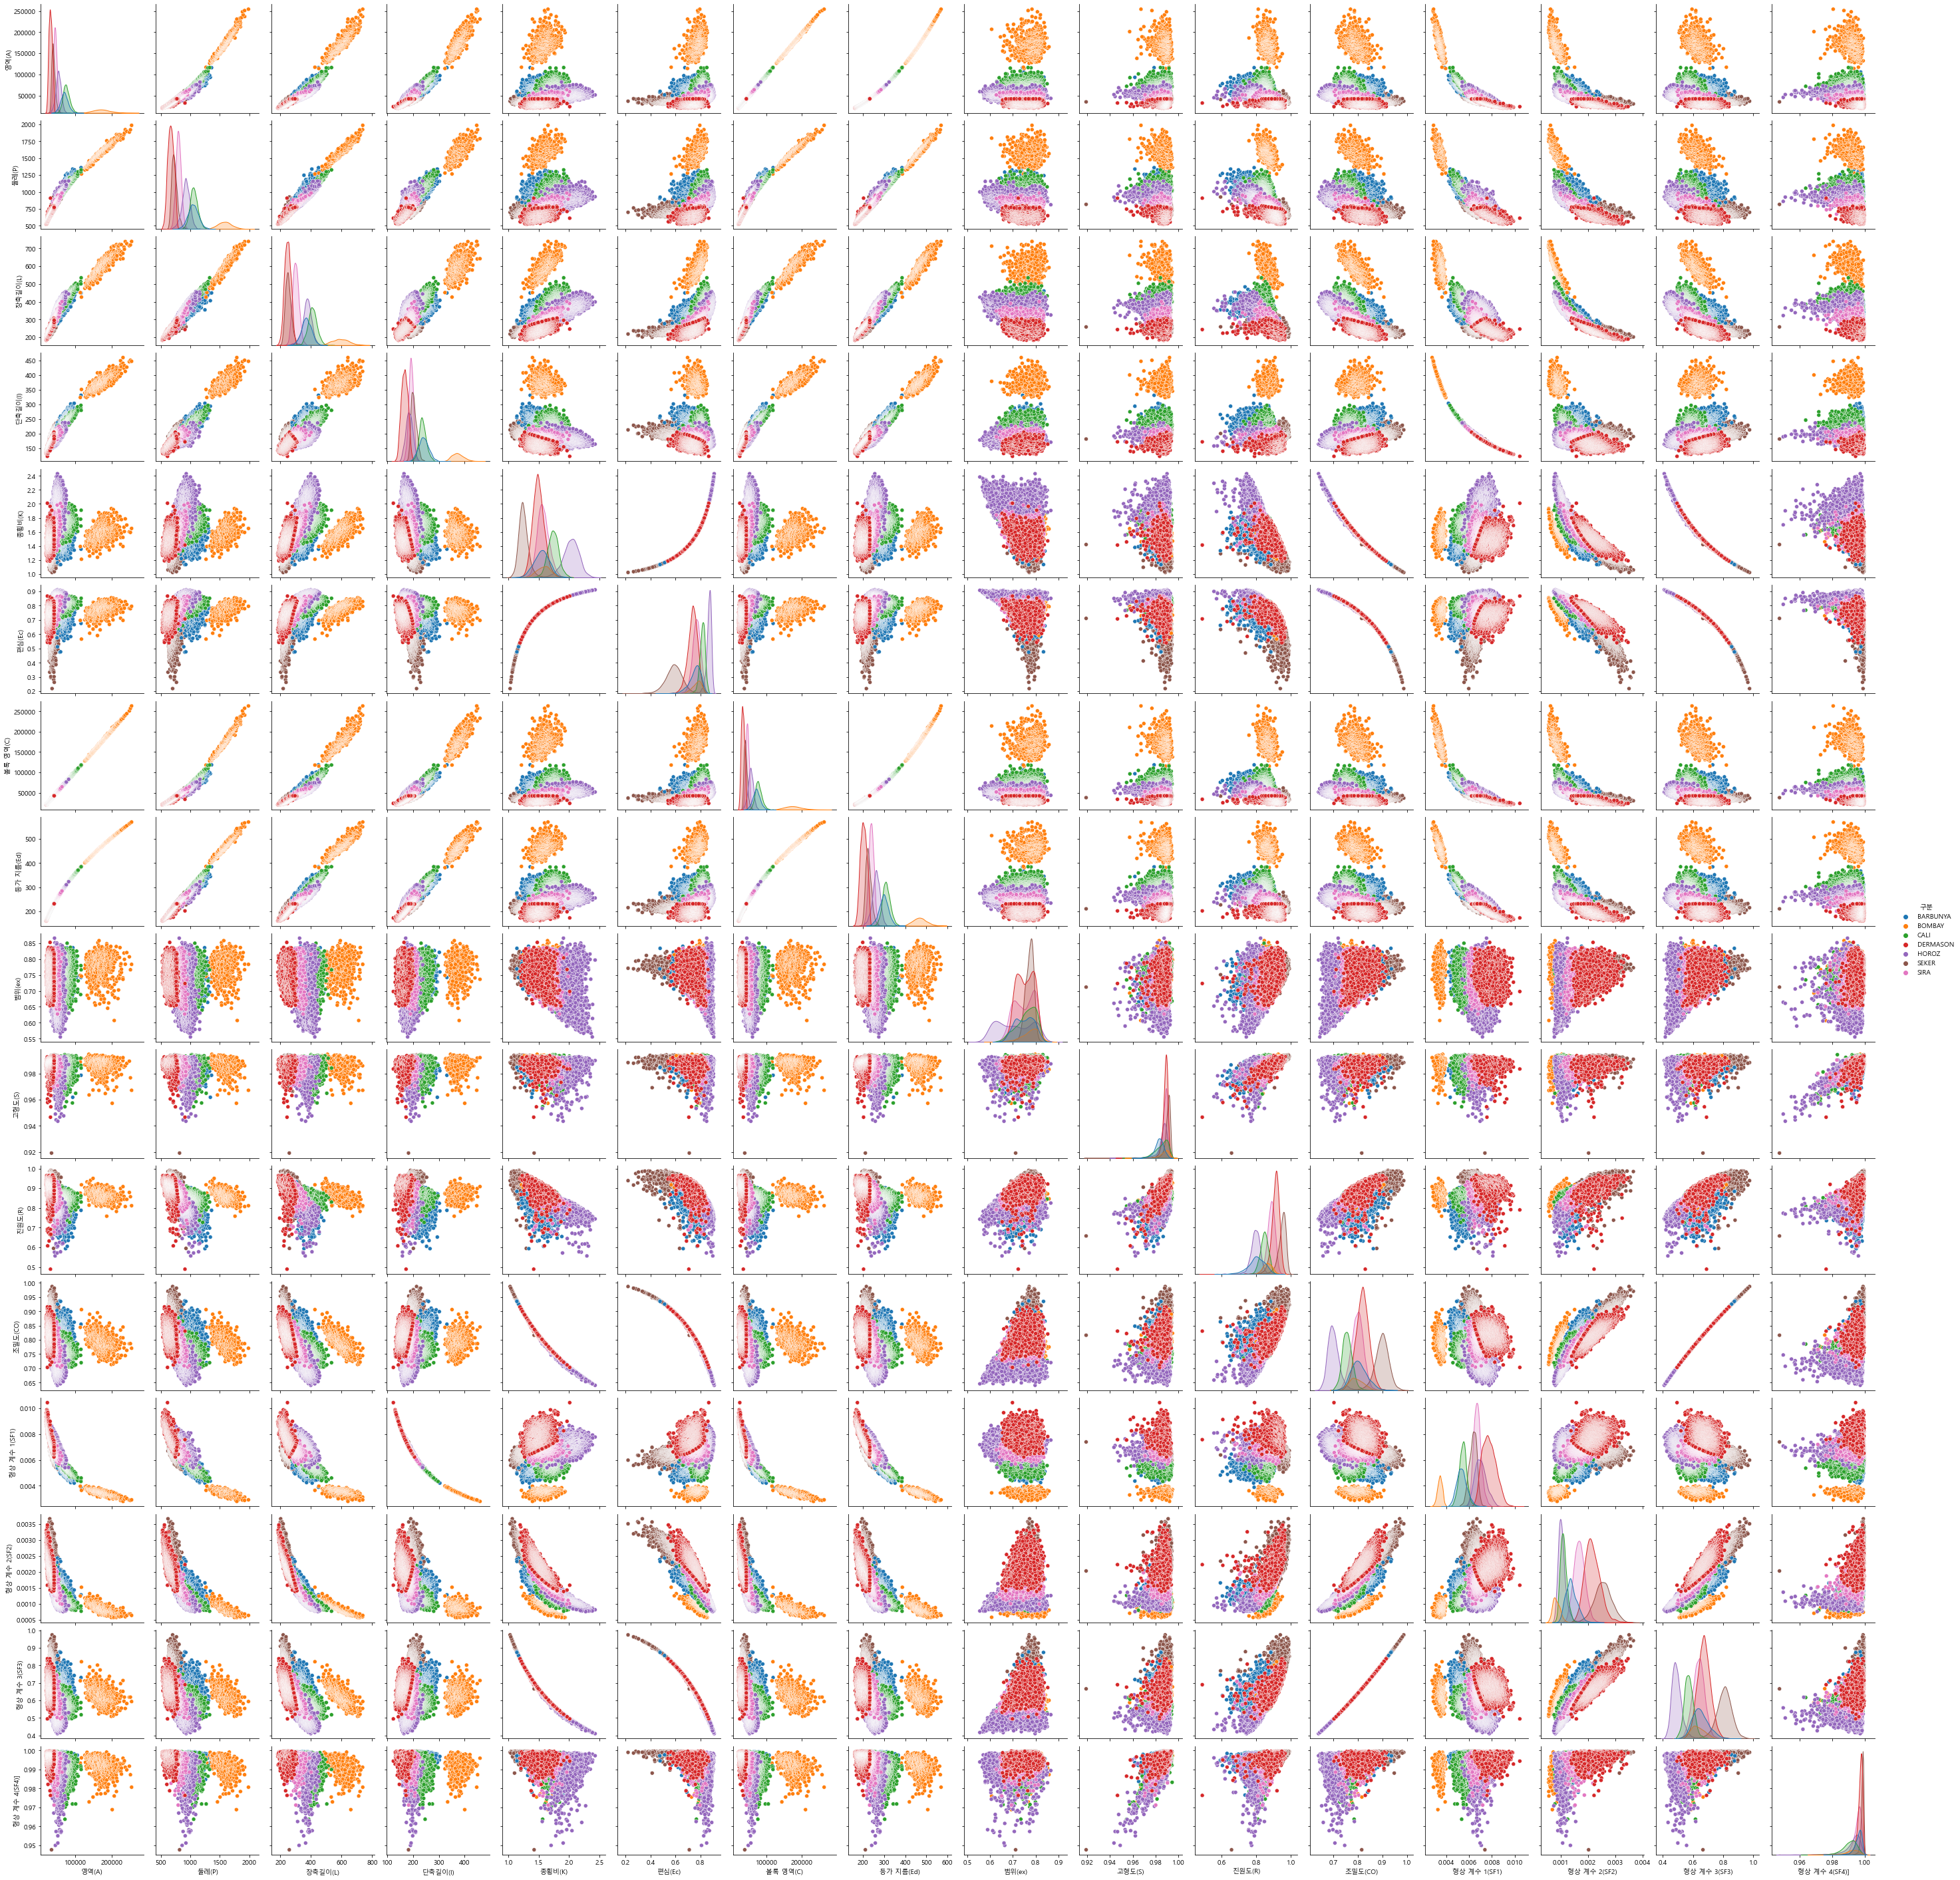

In [141]:
import seaborn as sns

sns.pairplot(data_df, hue="구분")
# 조밀도 > 진원도,형상 3
# 블록 영역> 영역
# 종횡비 > 편심
# 단축길이 > 둘레 > 장축길이
# 범위 > 고형도
# 형상 1 > 2,3,4

In [112]:
X = data.drop(['구분'], axis=1)
y = data['구분']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=705)

In [101]:
# 1-1) 로지스틱 회귀(파라미터 X)
lr = LogisticRegression()

In [102]:
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
print("훈련 데이터 점수 : {}".format(lr.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(lr.score(X_test,y_test)))

훈련 데이터 점수 : 0.702782131661442
평가 데이터 점수 : 0.7131942403761387


In [104]:
# 1-2) 로지스틱 회귀(모든 feature들과 비교함/ 1백만번의 iter값 부여)
lr = LogisticRegression(multi_class='auto', max_iter=1000000)

In [105]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000000)

In [107]:
print("훈련 데이터 점수 : {}".format(lr.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(lr.score(X_test,y_test)))

훈련 데이터 점수 : 0.9151645768025078
평가 데이터 점수 : 0.9133117837202468
